In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [24]:
bitcoin = pd.read_csv(r'BTC-EUR.csv', index_col='Date', parse_dates=True)

In [25]:
bitcoin.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-04-02,26200.447266,26503.300781,26038.351563,26143.123047,26143.123047,10008255691
2023-04-03,26190.798828,26242.431641,25746.605469,26103.367188,26103.367188,11371573698
2023-04-04,26088.345703,26207.369141,25016.271484,25479.769531,25479.769531,17930593363
2023-04-05,25484.402344,26048.492188,25385.251953,25706.507813,25706.507813,13948838292
2023-04-06,25708.001953,26218.404297,25511.515625,25843.804688,25843.804688,15639753287


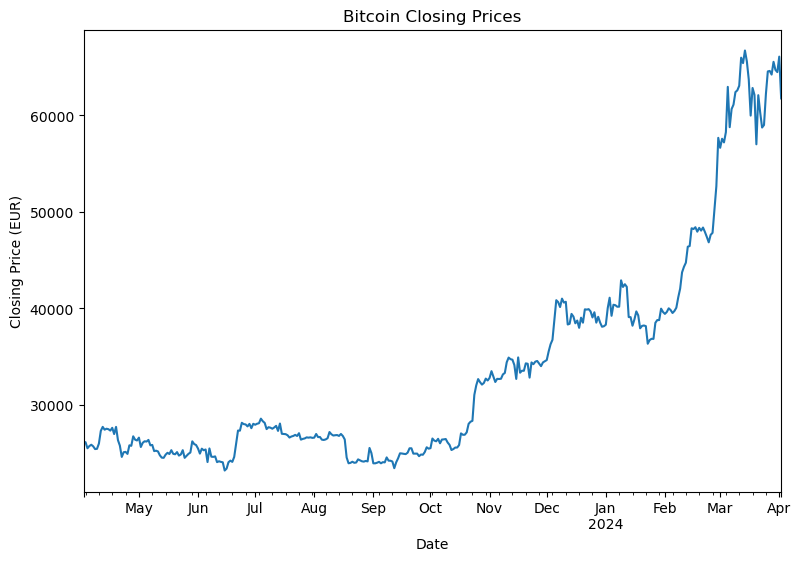

In [26]:
# Plot des données pour l'ensemble des dates
bitcoin['Close'].plot(figsize=(9,6))
plt.title('Bitcoin Closing Prices')
plt.xlabel('Date')
plt.ylabel('Closing Price (EUR)')
plt.show()


In [27]:
bitcoin.index

DatetimeIndex(['2023-04-02', '2023-04-03', '2023-04-04', '2023-04-05',
               '2023-04-06', '2023-04-07', '2023-04-08', '2023-04-09',
               '2023-04-10', '2023-04-11',
               ...
               '2024-03-24', '2024-03-25', '2024-03-26', '2024-03-27',
               '2024-03-28', '2024-03-29', '2024-03-30', '2024-03-31',
               '2024-04-01', '2024-04-02'],
              dtype='datetime64[ns]', name='Date', length=367, freq=None)

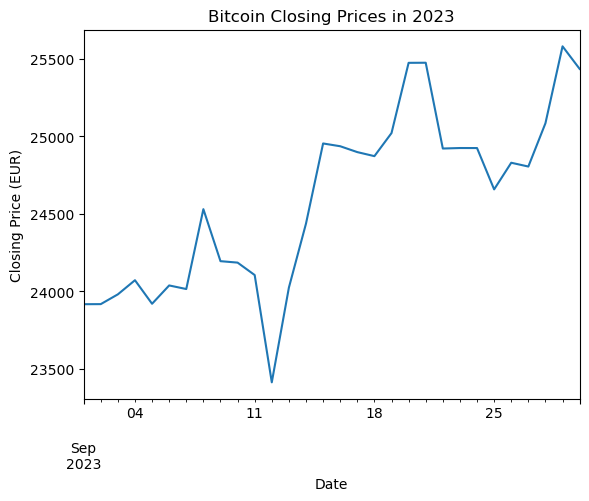

In [32]:
# Sélectionner et plotter les données pour l'année 2023
# bitcoin_2023 = bitcoin.loc['2023']
# bitcoin_2023['Close'].plot()
bitcoin.loc['2023-09']['Close'].plot()
plt.title('Bitcoin Closing Prices in 2023')
plt.xlabel('Date')
plt.ylabel('Closing Price (EUR)')
plt.show()

<Axes: xlabel='Date'>

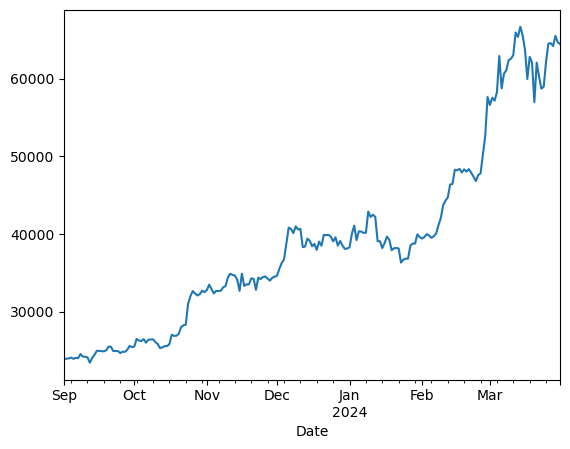

In [33]:
bitcoin.loc['2023-09': '2024-03' ]['Close'].plot()

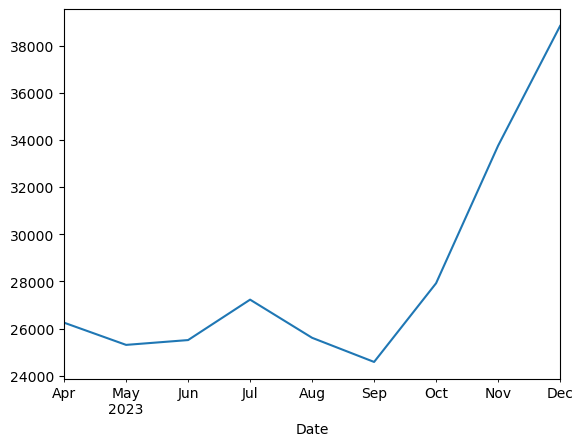

In [39]:
bitcoin.loc['2023']['Close'].resample('M').mean().plot()
plt.show()

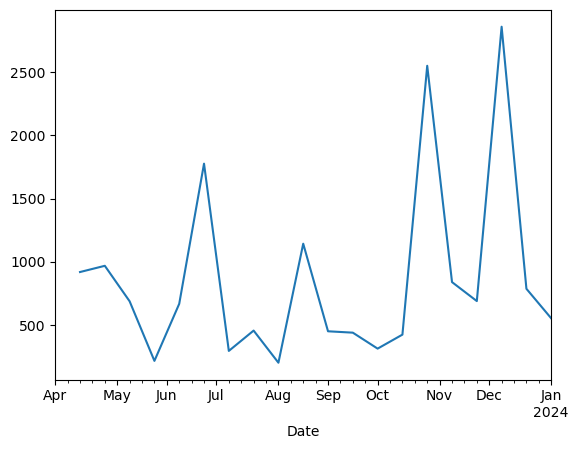

In [40]:
bitcoin.loc['2023']['Close'].resample('2W').std().plot()
plt.show()

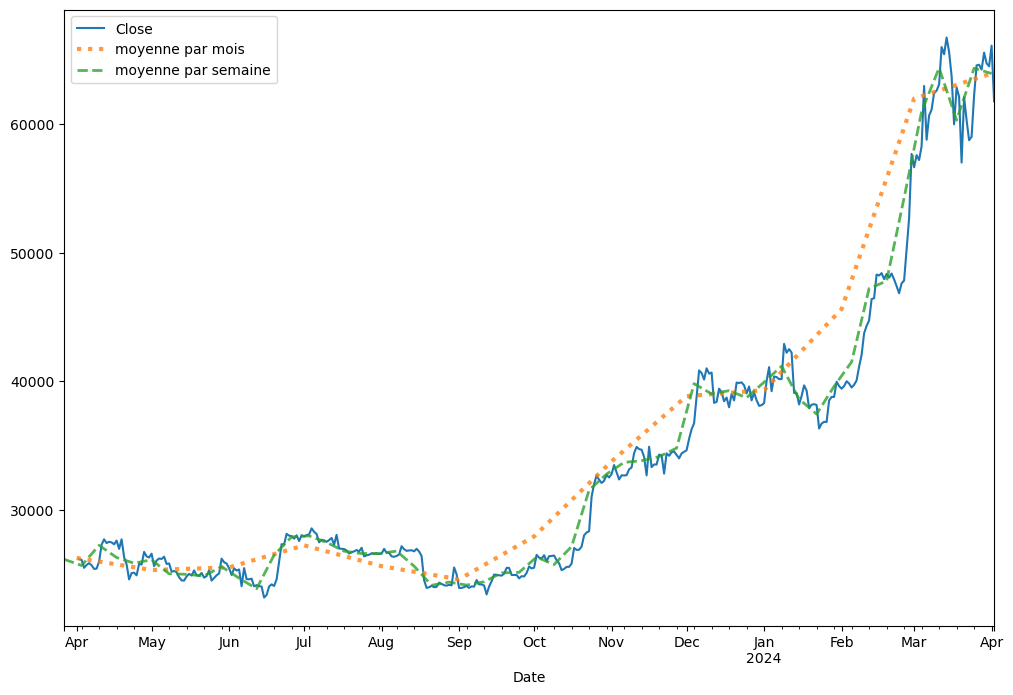

In [41]:
plt.figure(figsize=(12, 8))
bitcoin.loc['2023':'2024']['Close'].plot()
bitcoin.loc['2023':'2024']['Close'].resample('M').mean().plot(label='moyenne par mois', lw=3, ls=':', alpha=0.8)
bitcoin.loc['2023':'2024']['Close'].resample('W').mean().plot(label='moyenne par semaine', lw=2, ls='--', alpha=0.8)
plt.legend()
plt.show()

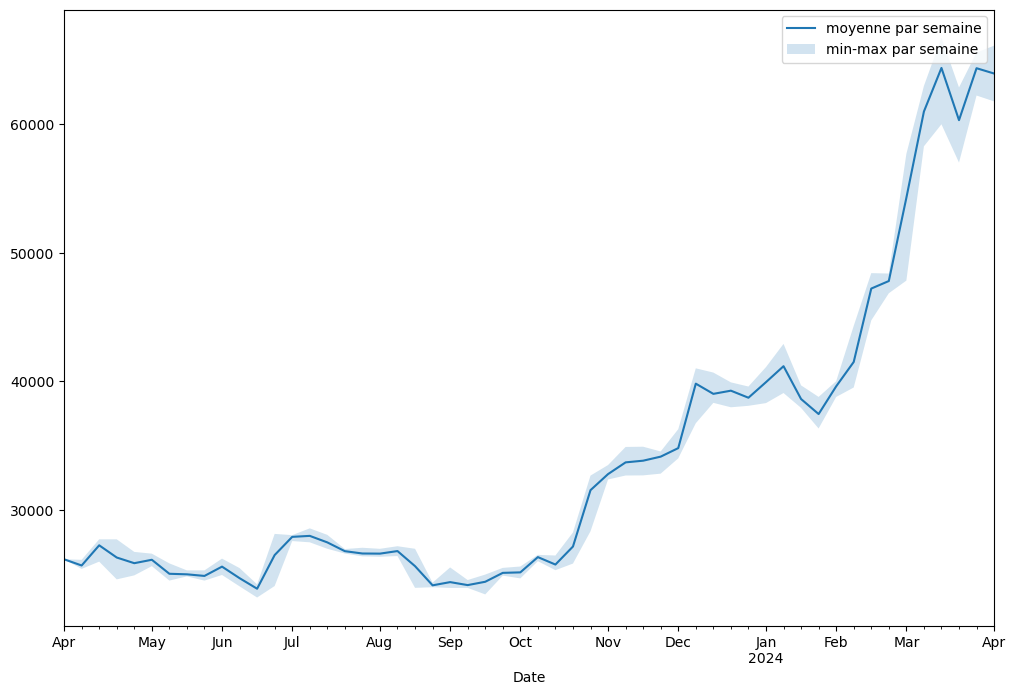

In [43]:
m = bitcoin['Close'].resample('W').agg(['mean', 'std', 'min', 'max'])
plt.figure(figsize=(12, 8))
m['mean']['2023': '2024'].plot(label='moyenne par semaine')
plt.fill_between(m.index, m['max'], m['min'], alpha=0.2, label='min-max par semaine')

plt.legend()
plt.show()

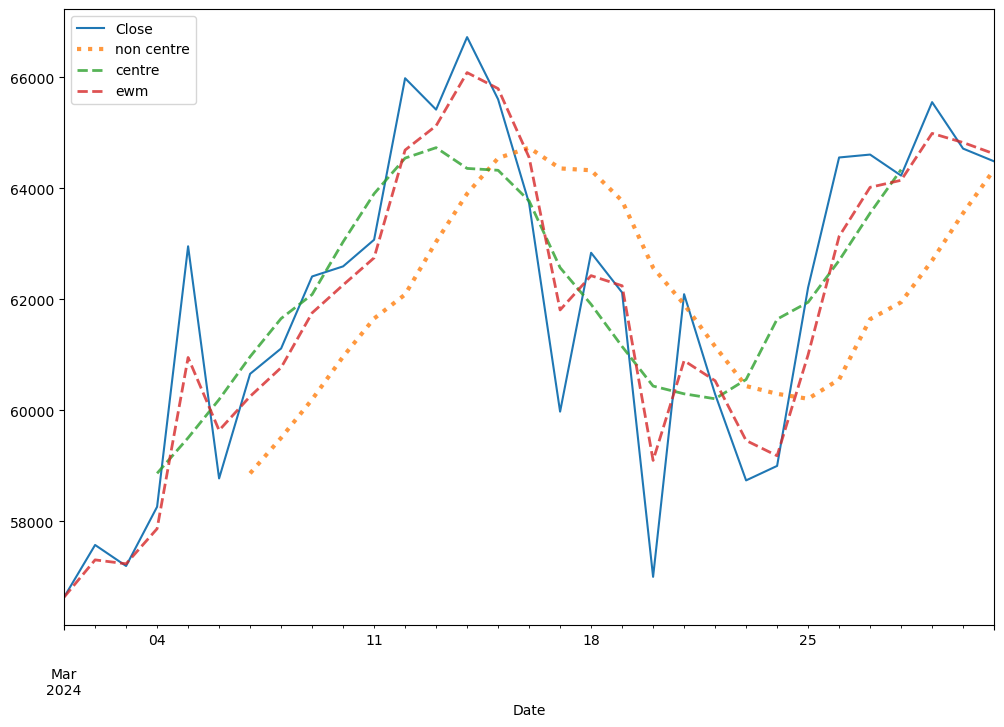

In [48]:
plt.figure(figsize=(12, 8))
bitcoin.loc['2024-03']['Close'].plot()
bitcoin.loc['2024-03']['Close'].rolling(window=7).mean().plot(label='non centre', lw=3, ls=':', alpha=0.8)
bitcoin.loc['2024-03']['Close'].rolling(window=7, center = True).mean().plot(label='centre', lw=2, ls='--', alpha=0.8)
bitcoin.loc['2024-03']['Close'].ewm(alpha=0.6).mean().plot(label='ewm', lw=2, ls='--', alpha=0.8)

plt.legend()
plt.show()

In [51]:
ethereum = pd.read_csv(r'ETH-EUR.csv', index_col='Date', parse_dates=True)

<Axes: xlabel='Date'>

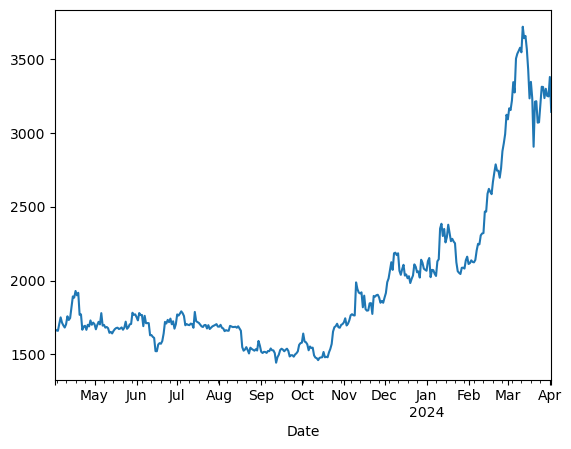

In [52]:
ethereum.loc['2023':'2024']['Close'].plot()

In [54]:
btc_eth=pd.merge(bitcoin, ethereum, on='Date', how='inner', suffixes=('_btc', '_eth'))

array([<Axes: xlabel='Date'>, <Axes: xlabel='Date'>], dtype=object)

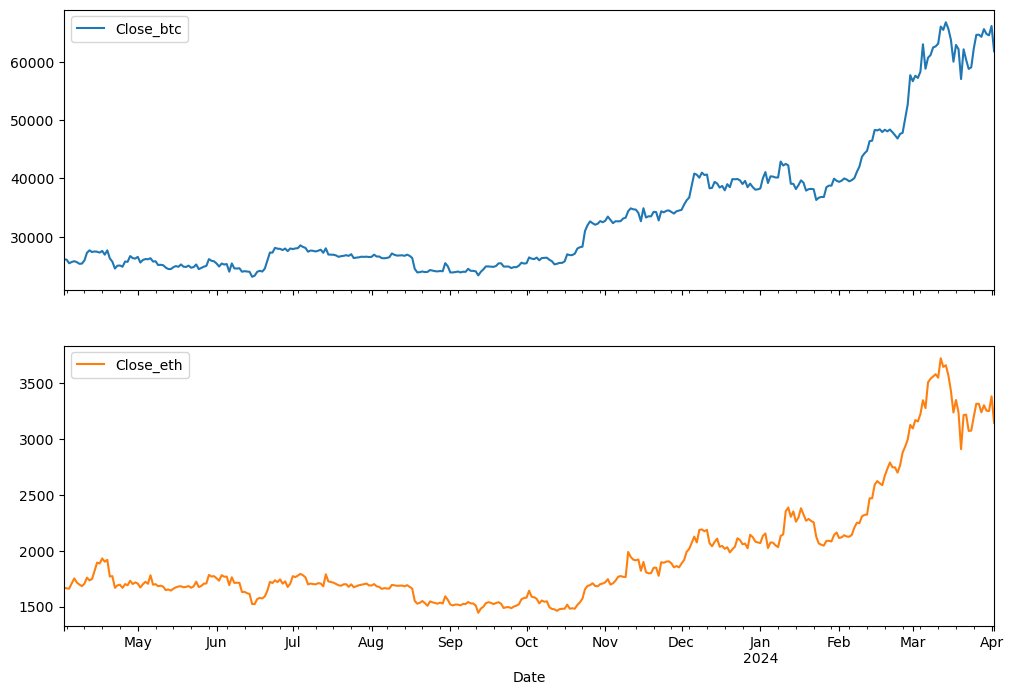

In [57]:
btc_eth[['Close_btc', 'Close_eth']].plot(subplots=True, figsize=(12, 8))

In [60]:
correlations = btc_eth[['Close_btc', 'Close_eth']].corr()

<Axes: >

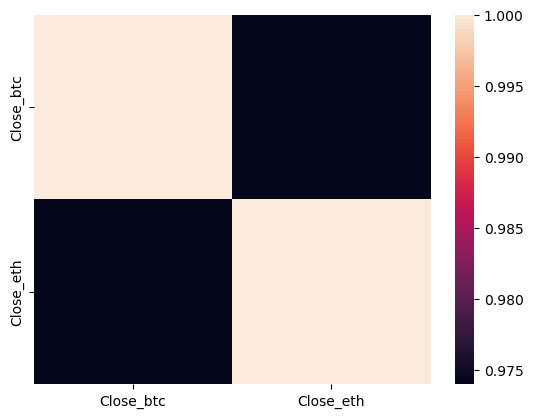

In [61]:
import seaborn as sns
sns.heatmap(correlations)

<Axes: xlabel='Date'>

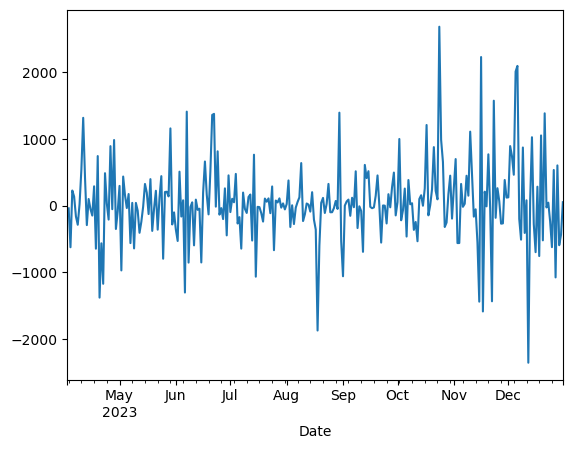

In [62]:
bitcoin['Close']['2023'].diff().plot()